# Libraries

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np 
import seaborn as sns
from numpy import random
from sklearn.tree import DecisionTreeClassifier

In [14]:
!gdown --id 1BqHFbVIJvyMI7wgO2-lHrLPlxa170cUs

Downloading...
From: https://drive.google.com/uc?id=1BqHFbVIJvyMI7wgO2-lHrLPlxa170cUs
To: /content/balloons.csv
100% 504/504 [00:00<00:00, 682kB/s]


In [15]:
balloons = pd.read_csv('balloons.csv')
balloons

,color,size,act,age,inflanted
0,yellow,small,stretch,adult,T
1,yellow,small,stretch,child,T
2,yellow,small,dip,adult,T
3,yellow,small,dip,child,T
4,yellow,large,stretch,adult,T
5,yellow,large,stretch,child,F
6,yellow,large,dip,adult,F
7,yellow,large,dip,child,F
8,purple,small,stretch,adult,T
9,purple,small,stretch,child,F


# Pre-Process

Drop Data Duplikat

In [16]:
balloons = balloons.drop_duplicates()
balloons

,color,size,act,age,inflanted
0,yellow,small,stretch,adult,T
1,yellow,small,stretch,child,T
2,yellow,small,dip,adult,T
3,yellow,small,dip,child,T
4,yellow,large,stretch,adult,T
5,yellow,large,stretch,child,F
6,yellow,large,dip,adult,F
7,yellow,large,dip,child,F
8,purple,small,stretch,adult,T
9,purple,small,stretch,child,F


Ubah nilai menjadi numerik

In [17]:
balloons['color'] = balloons['color'].replace(['yellow','purple'],[0,1])
balloons['size'] = balloons['size'].replace(['small','large'],[0,1])
balloons['act'] = balloons['act'].replace(['stretch','dip'],[0,1])
balloons['age'] = balloons['age'].replace(['adult','child'],[0,1])
balloons['inflanted'] = balloons['inflanted'].replace(['F','T'],[0,1])
balloons

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,color,size,act,age,inflanted
0,0,0,0,0,1
1,0,0,0,1,1
2,0,0,1,0,1
3,0,0,1,1,1
4,0,1,0,0,1
5,0,1,0,1,0
6,0,1,1,0,0
7,0,1,1,1,0
8,1,0,0,0,1
9,1,0,0,1,0


# Clustering

In [18]:
cluster_df = balloons[['color','size']].copy(deep=True) #dataframe baru dengan 2 kolom
cluster_df.sort_values(by=['color','size'], inplace=True)
cluster_arr = np.array(cluster_df) #dataframe diubah menjadi array

Fungsi Jarak

In [19]:
def count_distance(x1, x2):
    return (sum((x1 - x2) ** 2)) ** 0.5 #rumus menghitung jarak

Fungsi untuk menentukan cluster untuk setiap data

In [20]:
def define_clusters(centroids, cluster_arr):
    clusters = []
    for i in range(cluster_arr.shape[0]): #loop sebanyak jumlah baris
        distances = []
        for centroid in centroids: #loop sebanyak jumlah centroid sesuai dengan nilai K
            distances.append(count_distance(centroid, cluster_arr[i])) #menghitung distance dari tiap data dengan semua centroid
        cluster = [x for x, val in enumerate(distances) if val == min(distances)] #mencari centroid terdekat
        clusters.append(cluster[0]) #menentukan cluster
    return np.array(clusters)

Fungsi untuk menentukan centroid baru untuk setiap cluster

In [21]:
def count_centroids(clusters, cluster_arr):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_arr), pd.DataFrame(clusters, columns=['cluster'])], axis=1) #menggabungkan dataframe
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0) #mencari mean dari cluster
        new_centroids.append(cluster_mean) #mean tersebut menjadi centroid baru dalam cluster tersebut
    return np.array(new_centroids)

Main program

In [22]:
k = 3 #menentukan jumlah cluster
centroids = [cluster_arr[i+2] for i in range(k)] #random centroid awal
clusters = define_clusters(centroids, cluster_arr) #menentukan cluster berdasarkan centroid awal
initial_clusters = clusters
for i in range(20): #loop untuk mengulangi proses penentuan centroid dan penentuan cluster
    centroids = count_centroids(clusters, cluster_arr)
    clusters = define_clusters(centroids, cluster_arr)

Visualisasi clustering

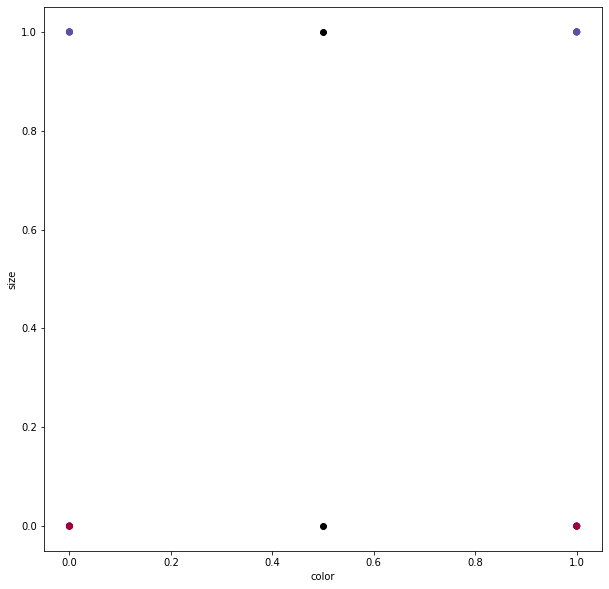

In [23]:
plt.subplots(figsize=(10,10))
plt.scatter(x=cluster_arr[:,0], y=cluster_arr[:,1], 
            c=clusters, cmap=plt.cm.Spectral);
plt.scatter(x=centroids[:,0], y=centroids[:,1], color='black');
plt.xlabel('color')
plt.ylabel('size');

# Klasifikasi

Membagi data train dan data test

In [31]:
df_train = balloons.sample(frac=0.75, random_state=25) #menentukan jumlah dataframe train
df_test = balloons.drop(df_train.index).reset_index().drop(['index'],axis=1) #menentukan jumlah dataframe test

Membagi berdasarkan target dan non-target

In [25]:
x_train = df_train.iloc[:, :-1].values #x = dataframe train non target
y_train = df_train.iloc[:, -1].values #y = dataframe train target

x_test = df_test.iloc[:, :-1].values #x = dataframe test non target
y_test = df_test.iloc[:, -1].values #y = dataframe test target

Melakukan Data Train

In [26]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0) #membuat sebuah model dengan metode decision tree classifier
model.fit(x_train, y_train) #memasukkan data train kedalam model menggunakan metode fit

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Melakukan Klasifikasi

In [33]:
y_pred = model.predict(x_test) #melakukan klasifikasi pada data test
df_hasil = pd.concat([pd.DataFrame(df_test, columns=['inflanted']) ,pd.DataFrame(y_pred, columns=['predict'])], axis=1) #menggabungkan data test dan hasil klasifikasi untuk perbandingan
df_hasil #menampilkan hasil

,inflanted,predict
0,1,1
1,0,1
2,0,1
3,0,1
